In [1]:
from pathlib import Path
from glob import glob

In [2]:
import datasets

In [3]:
import numpy as np
import pandas as pd

In [4]:
participants = [Path(file).name for file in glob('./data/ecg_preprocessed/*.csv')]

In [5]:
dataset = datasets.load_dataset(
    './data/ecg_preprocessed', 
    train_participants=participants[:5],
    trust_remote_code=True,
    num_proc=8
)['fit']

In [6]:
n_window = 60 * 1000
sampling_rate = 1000

In [7]:
window_shift_size = 0.25
step_size = int(window_shift_size * sampling_rate)

### Preprocessing

In [8]:
def encode(samples):
    baseline = ['Sitting', 'Recov1', 'Recov2', 'Recov3', 'Recov4', 'Recov5']#, 'Recov6']
    mental_stress = ['TA', 'SSST_Sing_countdown', 'Pasat', 'Raven', 'TA_repeat', 'Pasat_repeat']
    high_physical_stress = ['Treadmill1', 'Treadmill2', 'Treadmill3', 'Treadmill4', 'Walking_fast_pace', 'Cycling', 'stairs_up_and_down']
    moderate_physical_stress = ['Walking_own_pace', 'Dishes', 'Vacuum']
    low_physical_stress = ['Standing', 'Lying_supine', 'Recov_standing']
    
    def encode_multiclass(label):
        if label in baseline:
            return 0
        elif label in mental_stress:
            return 1
        elif label in high_physical_stress:
            return 2
        elif label in moderate_physical_stress:
            return 3
        elif label in low_physical_stress:
            return 4
        else:
            return -1
        
    return {
        'label': [encode_multiclass(label) for label in samples['category']],
    }
dataset = dataset.map(encode, batched=True, batch_size=2048, num_proc=4)

### Settings

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.rcParams["figure.figsize"] = (20, 10)

## Preprocessing (Filtering)

In [11]:
import neurokit2 as nk

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# start_idx = 10 * sampling_rate
# plot_window_size = 10 * sampling_rate

In [14]:
# recov6=dataset.filter(lambda x: x['category'] == 'Recov6')

In [15]:
# for i in range(1, 10):
#     start_idx = i * (sampling_rate + plot_window_size)

#     fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
#     sample = pd.DataFrame(recov6[start_idx:start_idx+plot_window_size])

#     ax.set_title("Raw ECG Sample", fontweight='bold')
#     ax.set_xlabel("Time (ms)", fontweight='bold')
#     ax.set_ylabel("Amplitude", fontweight='bold')

#     y_minor_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0001)
#     y_major_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0005) 

#     ax.set_yticks(y_minor_ticks, minor=True)
#     ax.set_yticks(y_major_ticks)

#     ax.axes.yaxis.set_ticklabels([])

#     x_minor_ticks = np.arange(0, len(sample), sampling_rate * 0.04) 
#     x_major_ticks = np.arange(0, len(sample), sampling_rate * 0.2)
#     ax.set_xticks(x_minor_ticks, minor=True)
#     ax.set_xticks(x_major_ticks)
#     ax.axes.xaxis.set_ticklabels([])
#     ax.set_xlim(0, len(sample))

#     ax.grid(which='minor', alpha=0.2, color='red')
#     ax.grid(which='major', alpha=0.5, color='red', linewidth=2)

#     ax.plot(sample['signal'], color='b', linewidth=2)
#     plt.hlines(0, 0, plot_window_size, color='black', linewidth=3)
#     plt.show()

In [16]:
# for i in range(1, 10):
#     start_idx = i * (sampling_rate + plot_window_size)

#     fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
#     sample = pd.DataFrame(dataset[start_idx:start_idx+plot_window_size])

#     ax.set_title("Raw ECG Sample", fontweight='bold')
#     ax.set_xlabel("Time (ms)", fontweight='bold')
#     ax.set_ylabel("Amplitude", fontweight='bold')

#     y_minor_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0001)
#     y_major_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0005) 

#     ax.set_yticks(y_minor_ticks, minor=True)
#     ax.set_yticks(y_major_ticks)

#     ax.axes.yaxis.set_ticklabels([])

#     x_minor_ticks = np.arange(0, len(sample), sampling_rate * 0.04) 
#     x_major_ticks = np.arange(0, len(sample), sampling_rate * 0.2)
#     ax.set_xticks(x_minor_ticks, minor=True)
#     ax.set_xticks(x_major_ticks)
#     ax.axes.xaxis.set_ticklabels([])
#     ax.set_xlim(0, len(sample))

#     ax.grid(which='minor', alpha=0.2, color='red')
#     ax.grid(which='major', alpha=0.5, color='red', linewidth=2)

#     ax.plot(sample['signal'], color='b', linewidth=2)
#     plt.hlines(0, 0, plot_window_size, color='black', linewidth=3)
#     plt.show()

In [17]:
# for i in range(10):
#     start_idx = i * (sampling_rate + plot_window_size)

#     fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
#     sample = pd.DataFrame(dataset[start_idx:start_idx+plot_window_size])

#     ax.set_title("Raw ECG Sample", fontweight='bold')
#     ax.set_xlabel("Time (ms)", fontweight='bold')
#     ax.set_ylabel("Amplitude", fontweight='bold')

#     y_minor_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0001)
#     y_major_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0005) 

#     ax.set_yticks(y_minor_ticks, minor=True)
#     ax.set_yticks(y_major_ticks)

#     # ax.axes.yaxis.set_ticklabels([])

#     x_minor_ticks = np.arange(0, len(sample), sampling_rate * 0.04) 
#     x_major_ticks = np.arange(0, len(sample), sampling_rate * 0.2)
#     ax.set_xticks(x_minor_ticks, minor=True)
#     ax.set_xticks(x_major_ticks)
#     # ax.axes.xaxis.set_ticklabels([])
#     ax.set_xlim(0, len(sample))

#     ax.grid(which='minor', alpha=0.2, color='red')
#     ax.grid(which='major', alpha=0.5, color='red', linewidth=2)

#     ax.plot(sample['signal'], color='b', linewidth=2)
#     plt.hlines(0, 0, plot_window_size, color='black', linewidth=3)
#     plt.show()

In [18]:
# for i in range(10):
#     start_idx = i * (sampling_rate + plot_window_size)

#     fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
#     sample = pd.DataFrame(dataset[start_idx:start_idx+plot_window_size])

#     ax.set_title("Cleaned ECG Sample", fontweight='bold')
#     ax.set_xlabel("Time (ms)", fontweight='bold')
#     ax.set_ylabel("Amplitude", fontweight='bold')

#     y_minor_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0001)
#     y_major_ticks = np.arange(sample['signal'].min(), sample['signal'].max(), 0.0005) 

#     ax.set_yticks(y_minor_ticks, minor=True)
#     ax.set_yticks(y_major_ticks)

#     # ax.axes.yaxis.set_ticklabels([])

#     x_minor_ticks = np.arange(0, len(sample), sampling_rate * 0.04) 
#     x_major_ticks = np.arange(0, len(sample), sampling_rate * 0.2)
#     ax.set_xticks(x_minor_ticks, minor=True)
#     ax.set_xticks(x_major_ticks)
#     # ax.axes.xaxis.set_ticklabels([])
#     ax.set_xlim(0, len(sample))

#     ax.grid(which='minor', alpha=0.2, color='red')
#     ax.grid(which='major', alpha=0.5, color='red', linewidth=2)

#     ax.plot(sample['signal'], color='gray', linewidth=2, alpha=0.3)
#     ax.plot(sample['ECG_Clean'], color='b', linewidth=2)
#     plt.hlines(0, 0, plot_window_size, color='black', linewidth=3)
#     plt.show()

In [19]:
# nk.ecg_delineate(dataset[0:0+60*1000]['signal'], show=True)

In [20]:
# nk.ecg_delineate(dataset[0:0+100*1000]['signal'], show=True)

In [21]:
# nk.ecg_delineate(dataset[0:0+100*1000]['ECG_Clean'], show=True)

### RQA

In [13]:
import neurokit2 as nk

In [14]:
ds = dataset.filter(lambda x, idx: x['label'] == idx, num_proc=8, fn_kwargs={'idx': 1})

(   RecurrenceRate   DiagRec  Determinism   DeteRec          L  Divergence  \
 0        0.164974 -0.033623     0.998051  6.049738  24.098814     0.00065   
 
         LEn  Laminarity  TrappingTime  VMax       VEn           W  WMax  \
 0  3.898675    0.998699     33.913214   283  4.187356  165.403264  5376   
 
         WEn  
 0  5.806399  ,
 {'Tolerance': 3.9064256421218816e-05,
  'Recurrence_Matrix': array([[1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         [1., 1., 1., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 1., 1., 1.]]),
  'Distance_Matrix': array([[0.00000000e+00, 2.01079996e-06, 3.99259738e-06, ...,
          7.43215874e-05, 7.12837228e-05, 6.83941392e-05],
         [2.01079996e-06, 0.00000000e+00, 1.98180568e-06, ...,
          7.23130504e-05, 6.92752441e-05, 6.63857454e-05],
         [3.99259738e-06, 1.98180568e-06, 0.00000000e+00, ...,
          7.033

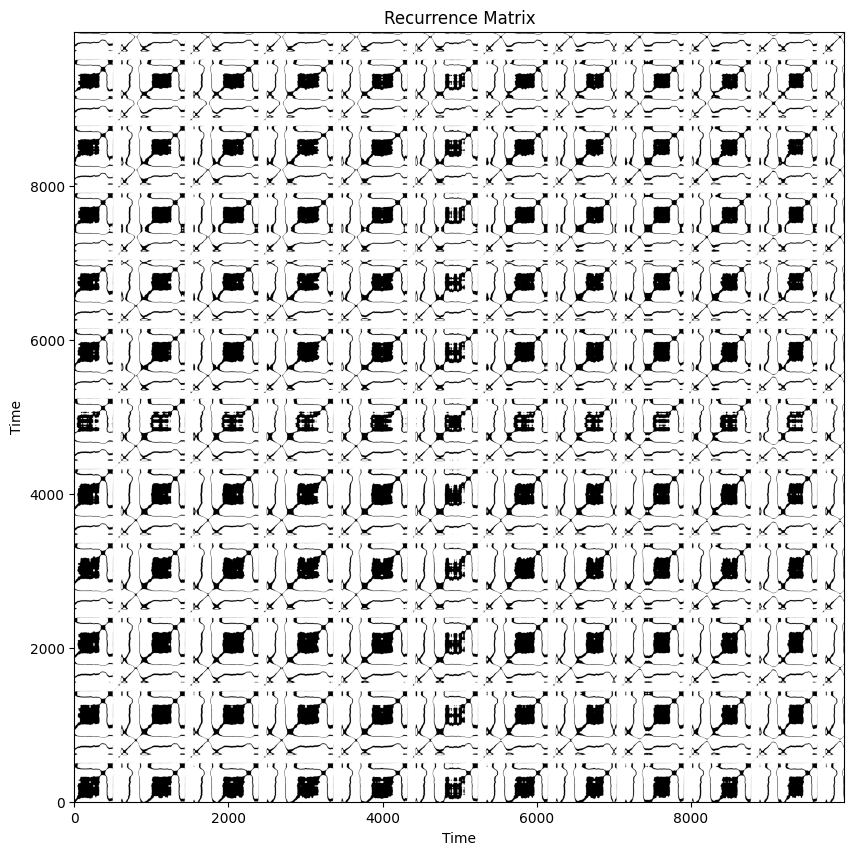

In [17]:
nk.complexity_rqa(ds[0:0+10*1000]['ECG_Clean'], show=True)

## Power Spectral Density (PSD)

In [22]:
import neurokit2 as nk

In [23]:
# for idx, category in enumerate(['baseline', 'mental_stress', 'high_physical_stress', 'moderate_physical_stress', 'low_physical_stress']):
#     ds = dataset.filter(lambda x, idx: x['label'] == idx, num_proc=8, fn_kwargs={'idx': idx})
#     x = ds['signal']

#     peaks, _ = nk.ecg_peaks(x, sampling_rate=sampling_rate)

#     fig, axes = plt.subplots(2, 3)
#     fig.suptitle(f'Power Spectral Density (PSD) for {category}')
#     for i, method in enumerate(['welch', 'welch-median', 'multitapers', 'lomb', 'burg', 'fft']):
#         ax = axes.flat[i]
#         if method == 'welch-median':
#             nk.hrv_frequency(peaks, sampling_rate=sampling_rate, psd_method='welch', psd_kwargs={'average': 'median'}, plt_kwargs={'ax': ax}, show=True)
#         else:
#             nk.hrv_frequency(peaks, sampling_rate=sampling_rate, psd_method=method, plt_kwargs={'ax': ax}, show=True)
#         ax.set_title(method)

Filter (num_proc=8): 100%|██████████| 42736000/42736000 [01:13<00:00, 581470.67 examples/s]
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:248: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  power, frequency = mne.time_frequency.psd_array_multitaper(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:248: RuntimeWarning: Not adaptively combining the spectral estimators due to a low number of tapers (1 < 3).
  power, frequency = mne.time_frequency.psd_array_multitaper(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:248: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  power, frequency = mne.time_frequency.psd_array_multitaper(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\neurokit2\signal\signal_psd.py:248: RuntimeWarning: Not adaptively c

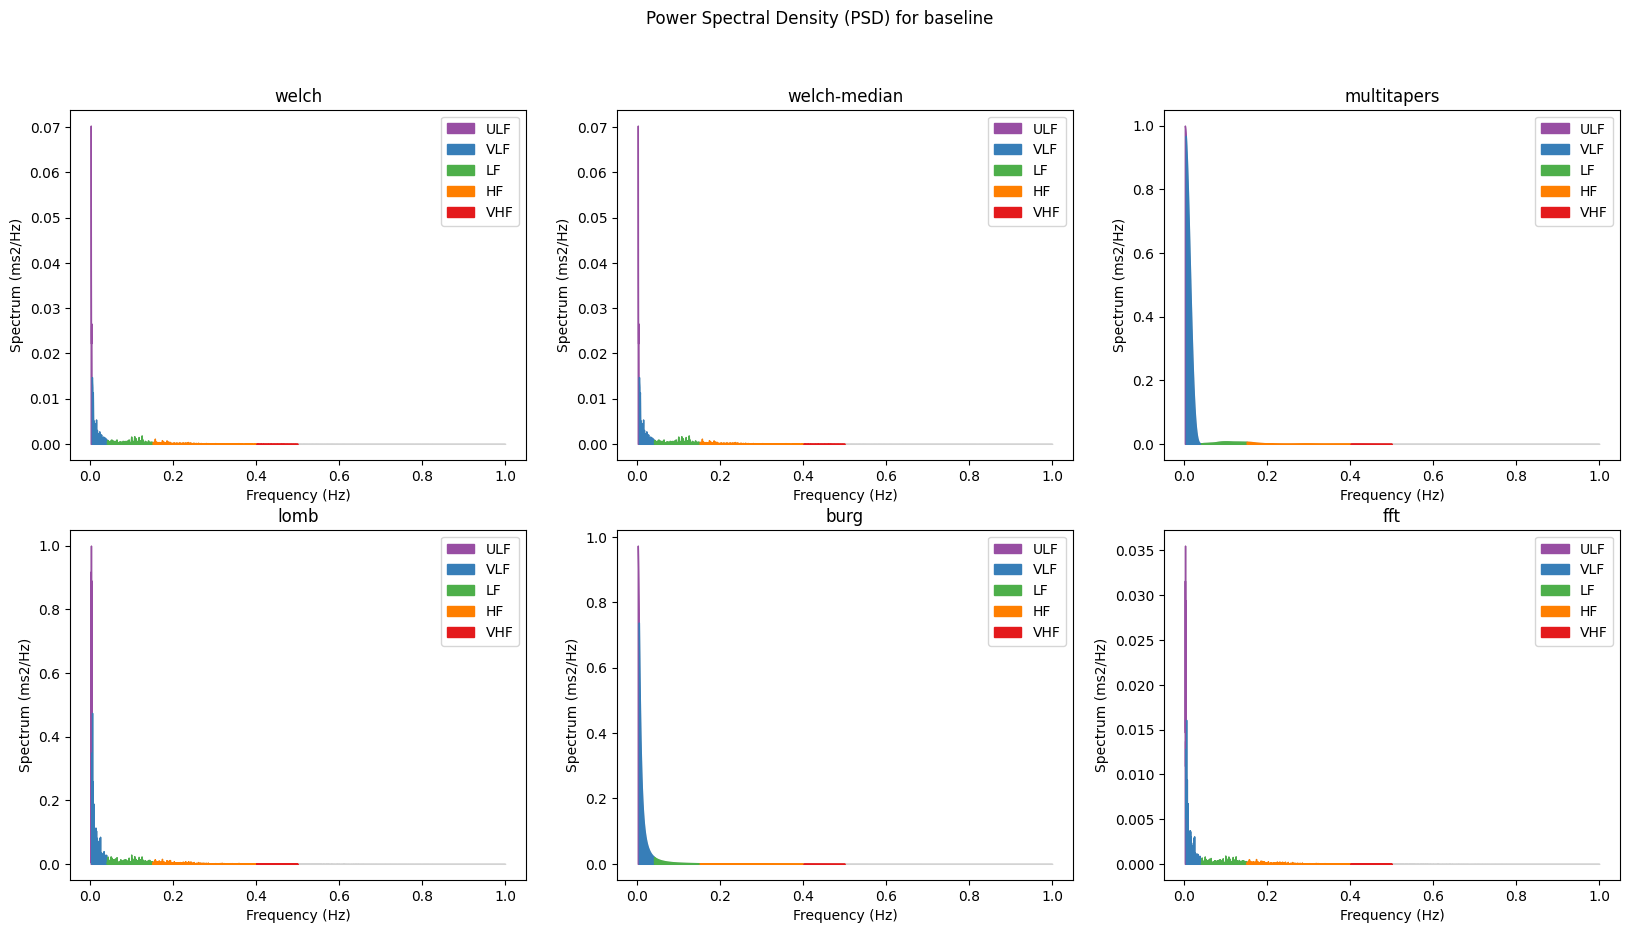

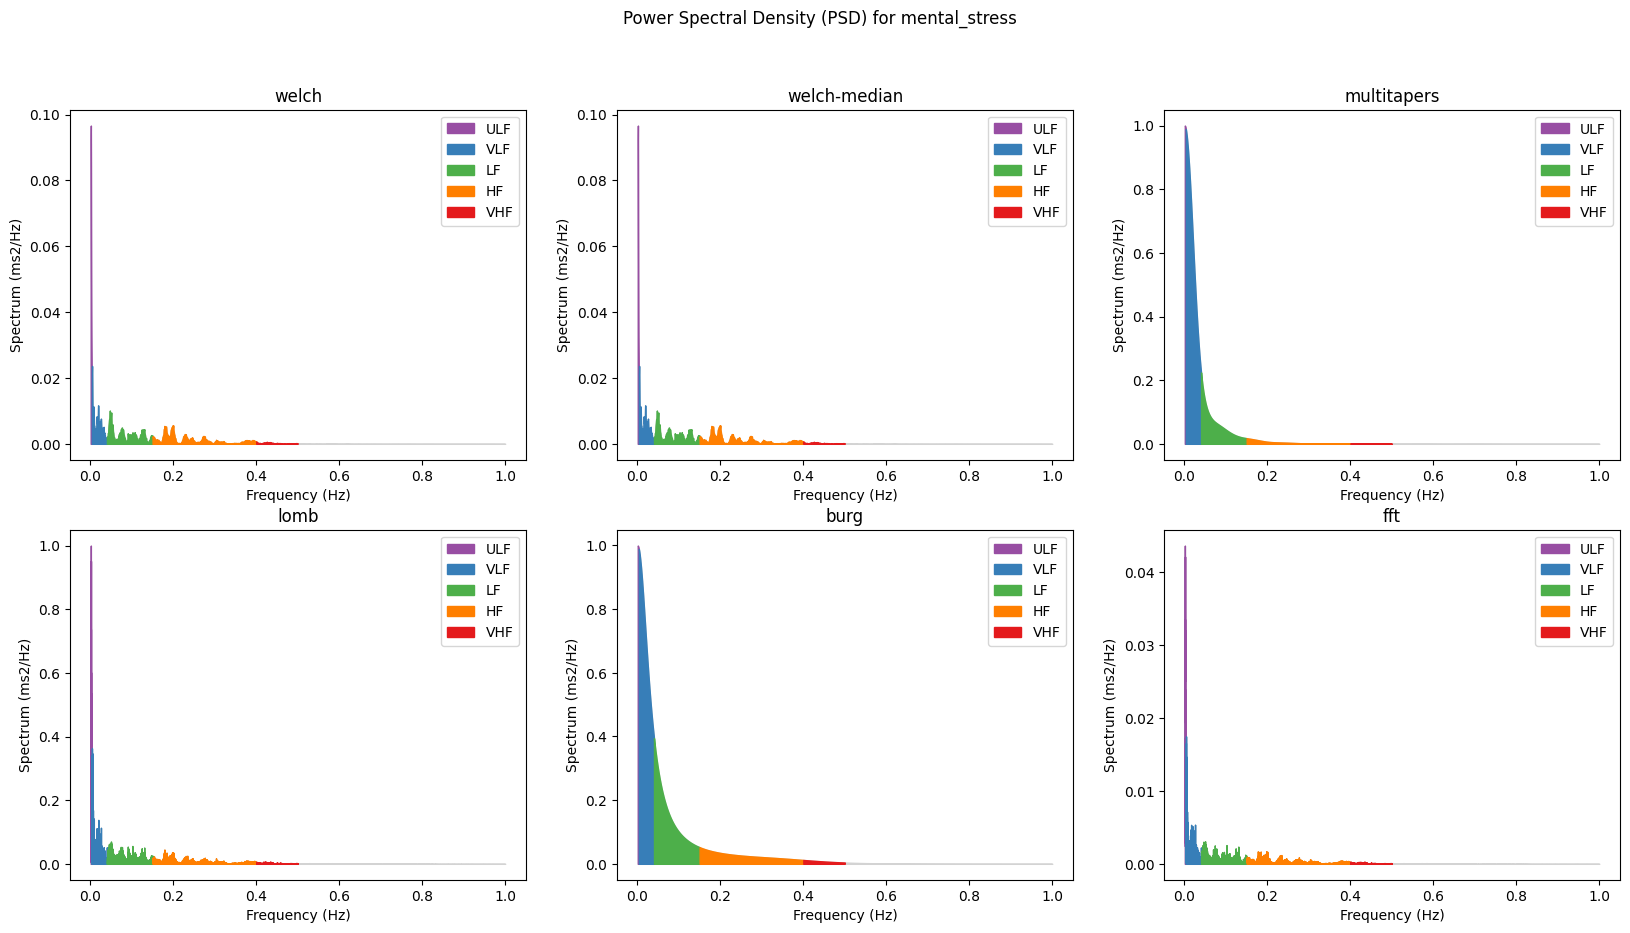

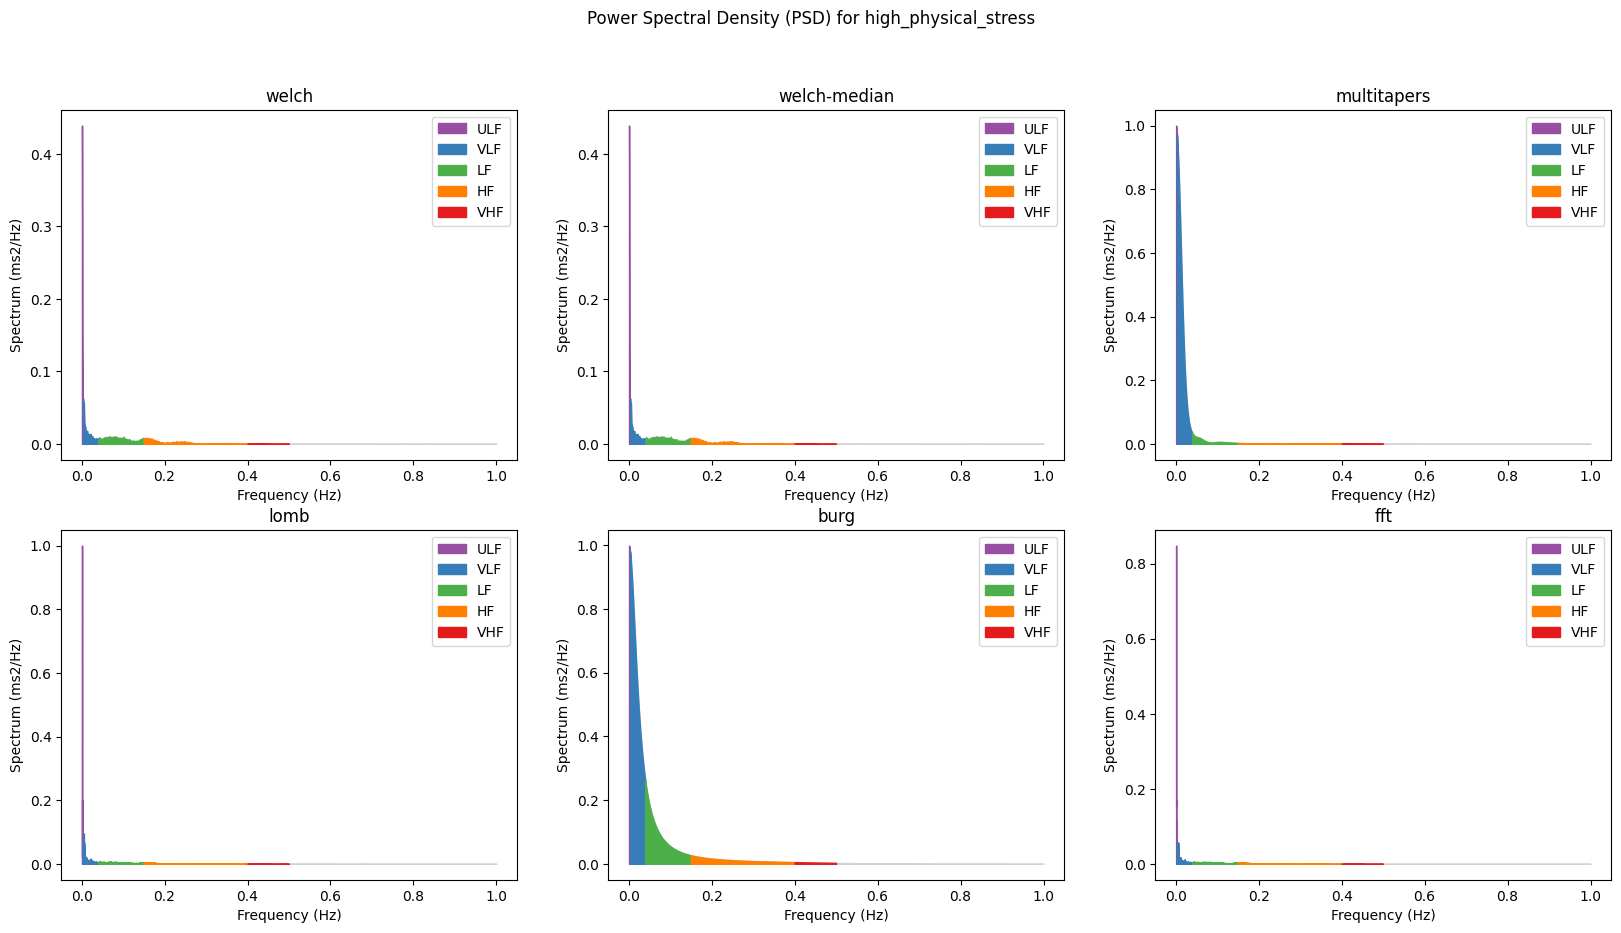

In [30]:
for idx, category in enumerate(['baseline', 'mental_stress', 'high_physical_stress']):
    ds = dataset.filter(lambda x, idx: x['label'] == idx, num_proc=8, fn_kwargs={'idx': idx})
    x = ds['signal']

    peaks, _ = nk.ecg_peaks(x, sampling_rate=sampling_rate)

    fig, axes = plt.subplots(2, 3)
    fig.suptitle(f'Power Spectral Density (PSD) for {category}')
    for i, method in enumerate(['welch', 'welch-median', 'multitapers', 'lomb', 'burg', 'fft']):
        ax = axes.flat[i]
        if method == 'welch-median':
            nk.hrv_frequency(peaks, sampling_rate=sampling_rate, psd_method='welch', psd_kwargs={'average': 'median'}, plt_kwargs={'ax': ax}, show=True)
        else:
            nk.hrv_frequency(peaks, sampling_rate=sampling_rate, psd_method=method, plt_kwargs={'ax': ax}, show=True)
        ax.set_title(method)

## R-R Interval Plots

In [32]:
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

from neurokit2.hrv.hrv_frequency import _hrv_frequency_show, hrv_frequency
from neurokit2.hrv.hrv_nonlinear import _hrv_nonlinear_show, hrv_nonlinear
from neurokit2.hrv.hrv_rsa import hrv_rsa
from neurokit2.hrv.hrv_time import hrv_time
from neurokit2.hrv.hrv_utils import _hrv_format_input
from neurokit2.hrv.intervals_process import intervals_process
from neurokit2.stats.density import density
from neurokit2.stats.rescale import rescale

In [39]:
def summary_plot(x, errorbars=0, **kwargs):
    """**Descriptive plot**

    Visualize a distribution with density, histogram, boxplot and rugs plots all at once.

    Examples
    --------
    .. ipython:: python

      import neurokit2 as nk
      import numpy as np

      x = np.random.normal(size=100)
      @savefig p_summary1.png scale=100%
      fig = nk.summary_plot(x)
      @suppress
      plt.close()

    """

    if "ax" in kwargs:
        fig = None
        ax = kwargs.get("ax")
        kwargs.pop("ax")
    else:
        fig, ax = plt.subplots()

    # Histogram
    counts, bins = np.histogram(x, bins=10, **kwargs)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    if errorbars > 0:
        samperr = np.std(counts) / np.sqrt(counts) * (st.norm.ppf(1-(1-errorbars)/2))
        ax.errorbar(bin_centers, counts, yerr=samperr, ecolor="#FF8C00", fmt='.', capsize=5, capthick=2)
    ax.hist(bins[:-1], bins, weights=counts, color="#2196F3", edgecolor="white", zorder=1, **kwargs)

    # Density
    x_axis, y_axis = density(x, **kwargs)
    y_axis = rescale(y_axis, to=[0, np.max(counts)])
    ax.plot(x_axis, y_axis, color="#E91E63", linewidth=1.5, zorder=2, **kwargs)

    # Points
    y_axis = np.full(len(x), 0.1)
    ax.scatter(x, y_axis, c="black", alpha=0.5, marker="|", zorder=3, **kwargs)

    # Boxplot
    ax.boxplot(
        x,
        vert=False,
        positions=[np.max(counts) / 10],
        widths=np.max(counts) / 10,
        manage_ticks=False,
        boxprops=dict(linewidth=1.5),
        medianprops=dict(linewidth=1.5),
        whiskerprops=dict(linewidth=1.5),
        capprops=dict(linewidth=1.5),
        zorder=4,
        **kwargs
    )

    return fig, ax

In [49]:
def get_category_color(category):
    if category == 'baseline':
        return '#3c78d8'
    elif category == 'mental_stress':
        return '#674ea7'
    elif category == 'high_physical_stress':
        return '#cc0000'
    else:
        return '#000000'

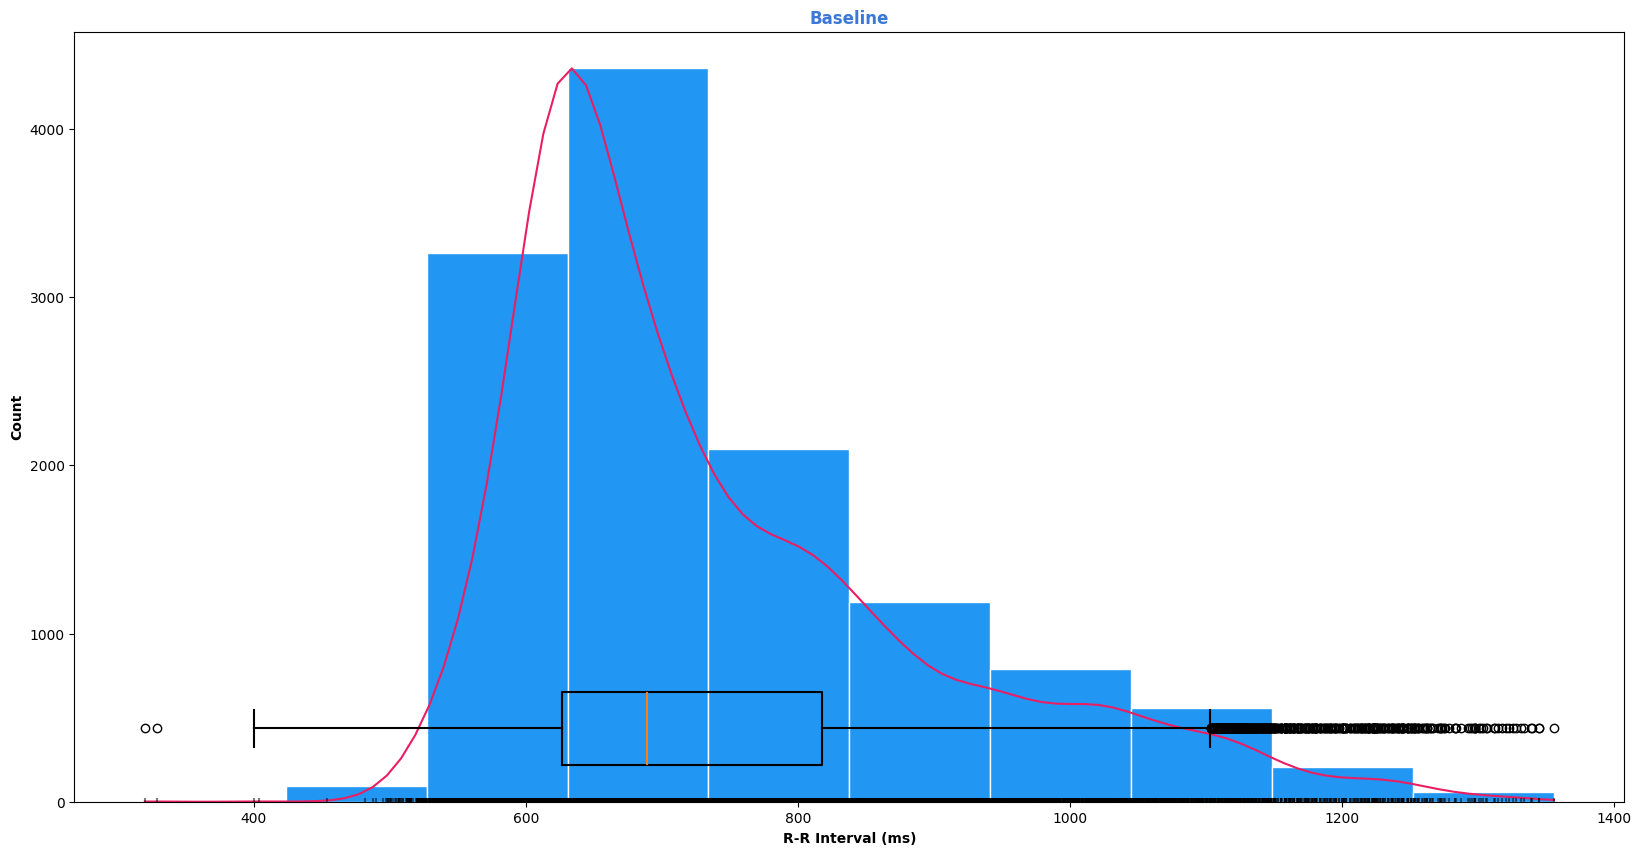

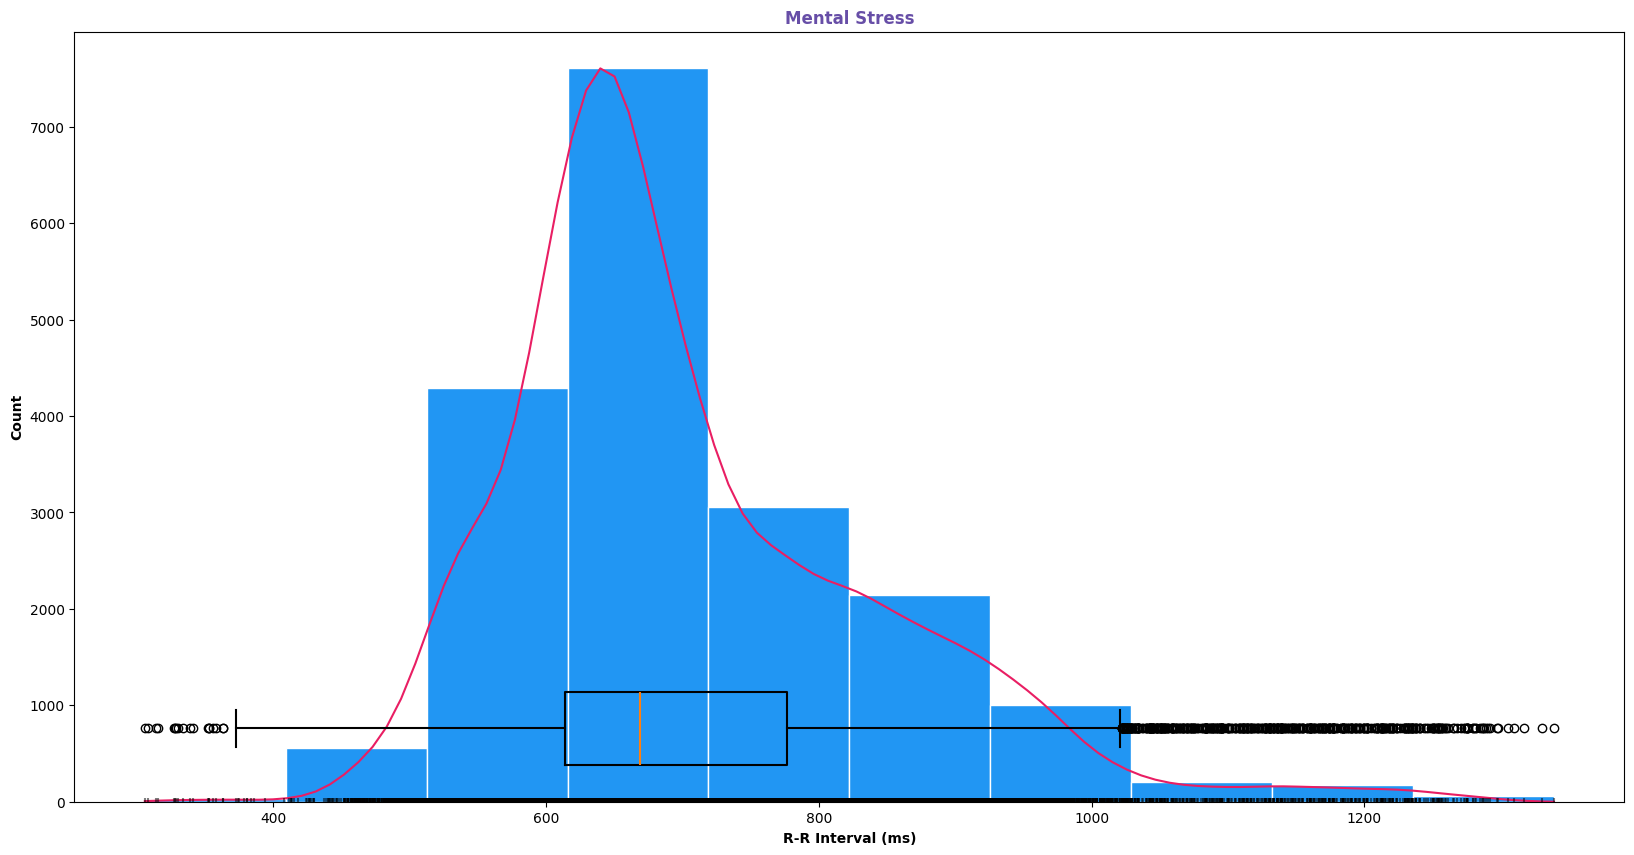

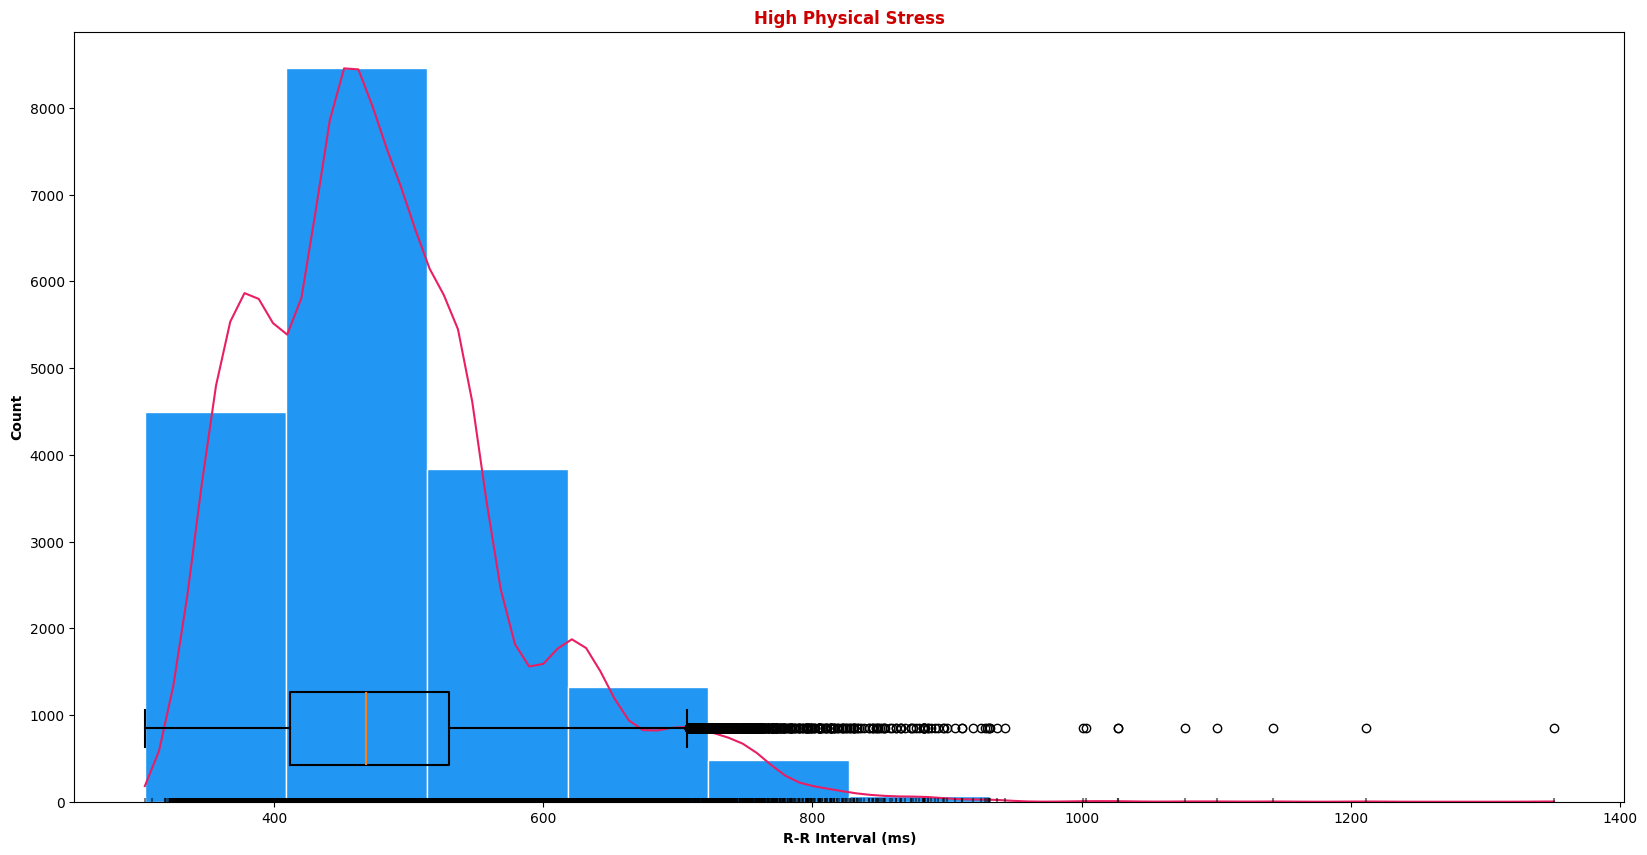

In [51]:
for idx, category in enumerate(['baseline', 'mental_stress', 'high_physical_stress']):
    ds = dataset.filter(lambda x, idx: x['label'] == idx, num_proc=8, fn_kwargs={'idx': idx})
    
    peaks, _ = nk.ecg_peaks(ds['signal'], sampling_rate=sampling_rate)
    rri, _, _ = _hrv_format_input(peaks, sampling_rate=sampling_rate)

    fig, ax = summary_plot(rri[rri <= 1500])
    ax.set_title(f'{category.replace("_", " ").title()}', fontweight='bold', color= get_category_color(category))
    ax.set_xlabel('R-R Interval (ms)', fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')

## Poincare Plot

In [55]:
import matplotlib
import scipy.stats

def _hrv_nonlinear_show(rri, out, ax=None, ax_marg_x=None, ax_marg_y=None):
    mean_heart_period = np.mean(rri)
    sd1 = out["SD1"]
    sd2 = out["SD2"]
    if isinstance(sd1, pd.Series):
        sd1 = float(sd1)
    if isinstance(sd2, pd.Series):
        sd2 = float(sd2)

    # Poincare values
    ax1 = rri[:-1]
    ax2 = rri[1:]

    # Set grid boundaries
    ax1_lim = (max(ax1) - min(ax1)) / 10
    ax2_lim = (max(ax2) - min(ax2)) / 10
    ax1_min = min(ax1) - ax1_lim
    ax1_max = max(ax1) + ax1_lim
    ax2_min = min(ax2) - ax2_lim
    ax2_max = max(ax2) + ax2_lim

    # Prepare figure
    if ax is None and ax_marg_x is None and ax_marg_y is None:
        gs = matplotlib.gridspec.GridSpec(4, 4)
        fig = plt.figure(figsize=(8, 8))
        ax_marg_x = plt.subplot(gs[0, 0:3])
        ax_marg_y = plt.subplot(gs[1:4, 3])
        ax = plt.subplot(gs[1:4, 0:3])
        gs.update(wspace=0.025, hspace=0.05)  # Reduce spaces
        plt.suptitle("Poincaré Plot")
    else:
        fig = None

    # Create meshgrid
    xx, yy = np.mgrid[ax1_min:ax1_max:100j, ax2_min:ax2_max:100j]

    # Fit Gaussian Kernel
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([ax1, ax2])
    kernel = scipy.stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    cmap = matplotlib.cm.get_cmap("Blues", 10)
    ax.contourf(xx, yy, f, cmap=cmap)
    ax.imshow(np.rot90(f), extent=[ax1_min, ax1_max, ax2_min, ax2_max], aspect="auto")

    # Marginal densities
    ax_marg_x.hist(ax1, bins=int(len(ax1) / 10), density=True, alpha=1, color="#ccdff0", edgecolor="none")
    ax_marg_y.hist(
        ax2,
        bins=int(len(ax2) / 10),
        density=True,
        alpha=1,
        color="#ccdff0",
        edgecolor="none",
        orientation="horizontal",
        zorder=1,
    )
    kde1 = scipy.stats.gaussian_kde(ax1)
    x1_plot = np.linspace(ax1_min, ax1_max, len(ax1))
    x1_dens = kde1.evaluate(x1_plot)

    ax_marg_x.fill(x1_plot, x1_dens, facecolor="none", edgecolor="#1b6aaf", alpha=0.8, linewidth=2)
    kde2 = scipy.stats.gaussian_kde(ax2)
    x2_plot = np.linspace(ax2_min, ax2_max, len(ax2))
    x2_dens = kde2.evaluate(x2_plot)
    ax_marg_y.fill_betweenx(x2_plot, x2_dens, facecolor="none", edgecolor="#1b6aaf", linewidth=2, alpha=0.8, zorder=2)

    # Turn off marginal axes labels
    ax_marg_x.axis("off")
    ax_marg_y.axis("off")

    # Plot ellipse
    angle = 45
    width = 2 * sd2 + 1
    height = 2 * sd1 + 1
    xy = (mean_heart_period, mean_heart_period)
    ellipse = matplotlib.patches.Ellipse(xy=xy, width=width, height=height, angle=angle, linewidth=2, fill=False)
    ellipse.set_alpha(0.5)
    ellipse.set_facecolor("#2196F3")
    ax.add_patch(ellipse)

    # Plot points only outside ellipse
    cos_angle = np.cos(np.radians(180.0 - angle))
    sin_angle = np.sin(np.radians(180.0 - angle))
    xc = ax1 - xy[0]
    yc = ax2 - xy[1]
    xct = xc * cos_angle - yc * sin_angle
    yct = xc * sin_angle + yc * cos_angle
    rad_cc = (xct ** 2 / (width / 2.0) ** 2) + (yct ** 2 / (height / 2.0) ** 2)

    points = np.where(rad_cc > 1)[0]
    ax.plot(ax1[points], ax2[points], "ro", color="k", alpha=0.5, markersize=4)

    # SD1 and SD2 arrow
    sd1_arrow = ax.arrow(
        mean_heart_period,
        mean_heart_period,
        float(-sd1 * np.sqrt(2) / 2),
        float(sd1 * np.sqrt(2) / 2),
        linewidth=3,
        ec="#E91E63",
        fc="#E91E63",
        label="STD1 (Short-term R-R Interval Fluctuations)",
    )
    sd2_arrow = ax.arrow(
        mean_heart_period,
        mean_heart_period,
        float(sd2 * np.sqrt(2) / 2),
        float(sd2 * np.sqrt(2) / 2),
        linewidth=3,
        ec="#FF9800",
        fc="#FF9800",
        label="STD2 (Long-term HRV changes)",
    )

    ax.set_xlabel(r"$RR_{n} (ms)$")
    ax.set_ylabel(r"$RR_{n+1} (ms)$")
    ax.legend(handles=[sd1_arrow, sd2_arrow], fontsize=12, loc="best")

    return fig, ax

In [53]:
baseline_ds = dataset.filter(lambda x: x['label'] == 0, num_proc=8)
baseline_peaks, _ = nk.ecg_peaks(baseline_ds['signal'], sampling_rate=sampling_rate)
baseline_rri, baseline_rri_time, baseline_rri_missing = _hrv_format_input(baseline_peaks, sampling_rate=sampling_rate)
baseline_out = [
    hrv_time(baseline_peaks, sampling_rate=sampling_rate),
    hrv_frequency(baseline_peaks, sampling_rate=sampling_rate),
    hrv_nonlinear(baseline_peaks, sampling_rate=sampling_rate)
]
baseline_out = pd.concat(baseline_out, axis=1)
baseline_out.columns = [col.replace("HRV_", "") for col in baseline_out.columns]

Filter (num_proc=8): 100%|██████████| 42736000/42736000 [01:13<00:00, 582598.80 examples/s]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd1 = float(sd1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd2 = float(sd2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Blues", 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take pr

Text(0, 0.5, '$RR_{n+1} (ms)$')

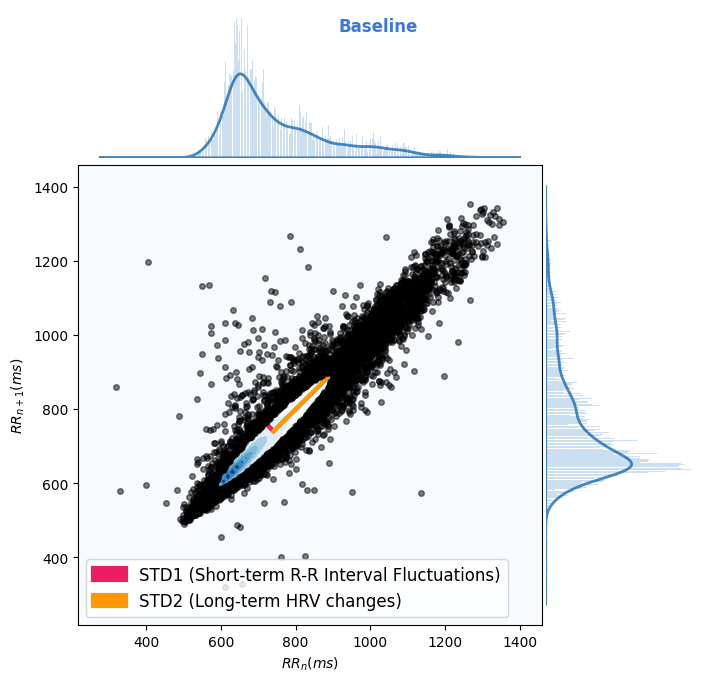

In [75]:
fig, ax = _hrv_nonlinear_show(baseline_rri[baseline_rri <= 1500], out=baseline_out)

plt.suptitle(f'{"Baseline".replace("_", " ").title()}', fontweight='bold', color= get_category_color("baseline"), y=0.87)
ax.set_xlabel(r"$RR_{n} (ms)$", fontweight='bold')
ax.set_ylabel(r"$RR_{n+1} (ms)$", fontweight='bold')

In [59]:
mental_stress_ds = dataset.filter(lambda x: x['label'] == 1, num_proc=8)
mental_stress_peaks, _ = nk.ecg_peaks(mental_stress_ds['signal'], sampling_rate=sampling_rate)
mental_stress_rri, mental_stress_rri_time, mental_stress_rri_missing = _hrv_format_input(mental_stress_peaks, sampling_rate=sampling_rate)
mental_stress_out = [
    hrv_time(mental_stress_peaks, sampling_rate=sampling_rate),
    hrv_frequency(mental_stress_peaks, sampling_rate=sampling_rate),
    hrv_nonlinear(mental_stress_peaks, sampling_rate=sampling_rate)
]
mental_stress_out = pd.concat(mental_stress_out, axis=1)
mental_stress_out.columns = [col.replace("HRV_", "") for col in mental_stress_out.columns]

Filter (num_proc=8): 100%|██████████| 42736000/42736000 [04:37<00:00, 153924.88 examples/s]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd1 = float(sd1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd2 = float(sd2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Blues", 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take pr

Text(0, 0.5, '$RR_{n+1} (ms)$')

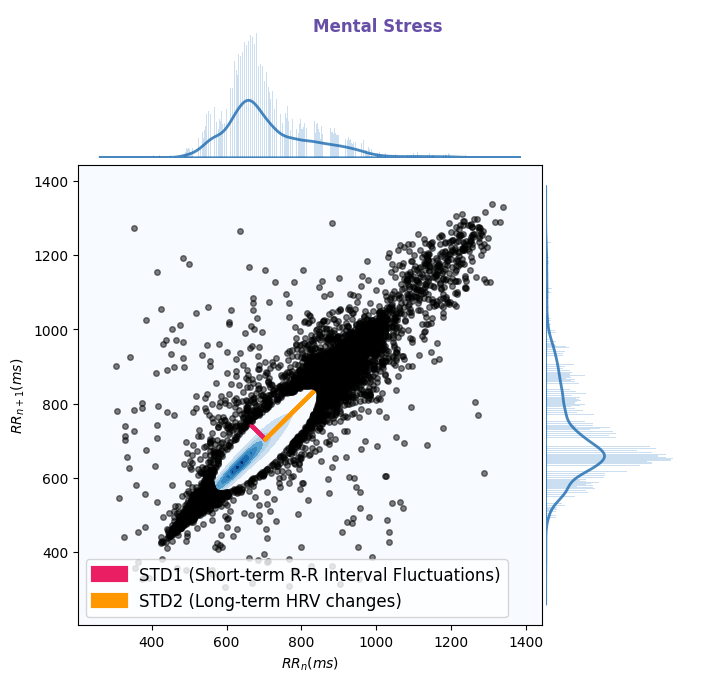

In [76]:
fig, ax = _hrv_nonlinear_show(mental_stress_rri[mental_stress_rri <= 1500], out=mental_stress_out)

plt.suptitle(f'{"Mental Stress".replace("_", " ").title()}', fontweight='bold', color= get_category_color("mental_stress"),y=0.87)
ax.set_xlabel(r"$RR_{n} (ms)$", fontweight='bold')
ax.set_ylabel(r"$RR_{n+1} (ms)$", fontweight='bold')

In [61]:
high_physical_activity_ds = dataset.filter(lambda x: x['label'] == 2, num_proc=8)
high_physical_activity_peaks, _ = nk.ecg_peaks(high_physical_activity_ds['signal'], sampling_rate=sampling_rate)
high_physical_activity_rri,high_physical_activity_rri_time, high_physical_activity_rri_missing = _hrv_format_input(high_physical_activity_peaks, sampling_rate=sampling_rate)
high_physical_activity_out = [
    hrv_time(high_physical_activity_peaks, sampling_rate=sampling_rate),
    hrv_frequency(high_physical_activity_peaks, sampling_rate=sampling_rate),
    hrv_nonlinear(high_physical_activity_peaks, sampling_rate=sampling_rate)
]
high_physical_activity_out = pd.concat(high_physical_activity_out, axis=1)
high_physical_activity_out.columns = [col.replace("HRV_", "") for col in high_physical_activity_out.columns]

Filter (num_proc=8): 100%|██████████| 42736000/42736000 [01:09<00:00, 613301.78 examples/s]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd1 = float(sd1)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sd2 = float(sd2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Blues", 10)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\3648715230.py:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take pr

Text(0, 0.5, '$RR_{n+1} (ms)$')

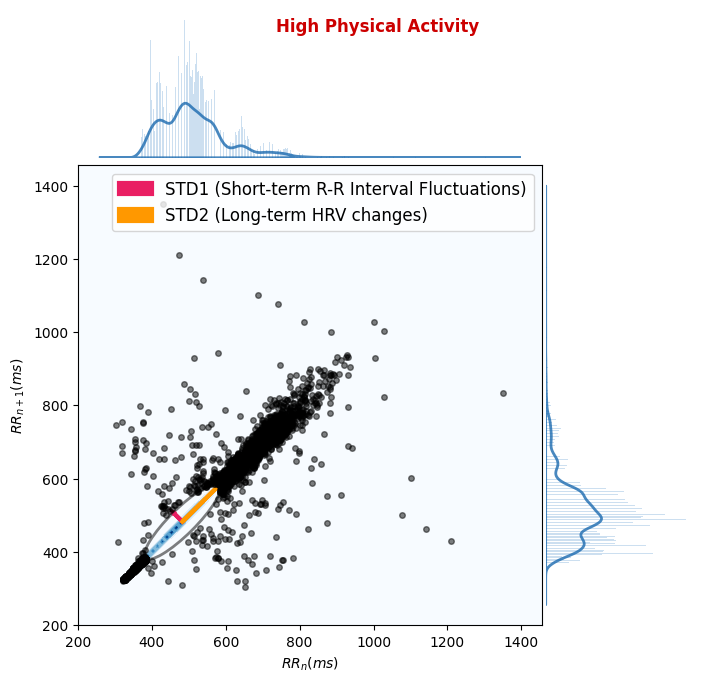

In [78]:
fig, ax = _hrv_nonlinear_show(high_physical_activity_rri[high_physical_activity_rri <= 1500], out=high_physical_activity_out)

plt.suptitle(f'{"High Physical Activity".replace("_", " ").title()}', fontweight='bold', color= get_category_color("high_physical_stress"),y=0.87)
ax.set_xlabel(r"$RR_{n} (ms)$", fontweight='bold')
ax.set_ylabel(r"$RR_{n+1} (ms)$", fontweight='bold')

## PSD Plot

In [81]:
baseline_rri, baseline_rri_time, sampling_rate = intervals_process(
    baseline_rri, intervals_time=baseline_rri_time, interpolate=True, interpolation_rate=100
)

In [91]:
mental_stress_rri, mental_stress_rri_time, sampling_rate = intervals_process(
    mental_stress_rri, intervals_time=mental_stress_rri_time, interpolate=True, interpolation_rate=100
)

In [92]:
high_physical_activity_rri, high_physical_activity_rri_time, sampling_rate = intervals_process(
    high_physical_activity_rri, intervals_time=high_physical_activity_rri_time, interpolate=True, interpolation_rate=100
)

In [79]:
frequency_bands = baseline_out[["ULF", "VLF", "LF", "HF", "VHF"]]

In [82]:
from neurokit2.signal.signal_psd import signal_psd

In [83]:
def _signal_power_instant_plot(psd, out, frequency_band, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = None

    # Sanitize signal
    if isinstance(frequency_band[0], int):
        if len(frequency_band) > 2:
            print(
                "NeuroKit error: signal_power(): The `frequency_band` argument must be a list of tuples"
                " or a tuple of 2 integers"
            )
        else:
            frequency_band = [tuple(i for i in frequency_band)]

    freq = np.array(psd["Frequency"])
    power = np.array(psd["Power"])

    # Get indexes for different frequency band
    frequency_band_index = []
    for band in frequency_band:
        indexes = np.logical_and(psd["Frequency"] >= band[0], psd["Frequency"] < band[1])  # pylint: disable=E1111
        frequency_band_index.append(np.array(indexes))

    label_list = list(out.keys())

    # Get cmap
    cmap = matplotlib.cm.get_cmap("Set1")
    colors = cmap.colors
    colors = (
        colors[3],
        colors[1],
        colors[2],
        colors[4],
        colors[0],
        colors[5],
        colors[6],
        colors[7],
        colors[8],
    )  # manually rearrange colors
    colors = colors[0 : len(frequency_band_index)]

    # Plot
    ax.set_title("Power Spectral Density (PSD) for Frequency Domains")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Spectrum (ms2/Hz)")

    ax.fill_between(freq, 0, power, color="lightgrey")

    for band_index, label, i in zip(frequency_band_index, label_list, colors):
        ax.fill_between(freq[band_index], 0, power[band_index], label=label, color=i)
        ax.legend(prop={"size": 10}, loc="best")

    return fig, ax

In [84]:
def _hrv_frequency_show(
    rri,
    out_bands,
    ulf=(0, 0.0033),
    vlf=(0.0033, 0.04),
    lf=(0.04, 0.15),
    hf=(0.15, 0.4),
    vhf=(0.4, 0.5),
    sampling_rate=1000,
    **kwargs
):

    if "ax" in kwargs:
        ax = kwargs.get("ax")
        kwargs.pop("ax")
    else:
        __, ax = plt.subplots()

    frequency_band = [ulf, vlf, lf, hf, vhf]
    for i in range(len(frequency_band)):  # pylint: disable=C0200
        min_frequency = frequency_band[i][0]
        if min_frequency == 0:
            min_frequency = 0.001  # sanitize lowest frequency

        window_length = int((2 / min_frequency) * sampling_rate)
        if window_length <= len(rri) / 2:
            break

    psd = signal_psd(rri, sampling_rate=sampling_rate, show=False, min_frequency=min_frequency, max_frequency=0.5)

    return _signal_power_instant_plot(psd, out_bands, frequency_band, ax=ax)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\1057777506.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Set1")


(0.0, 0.01)

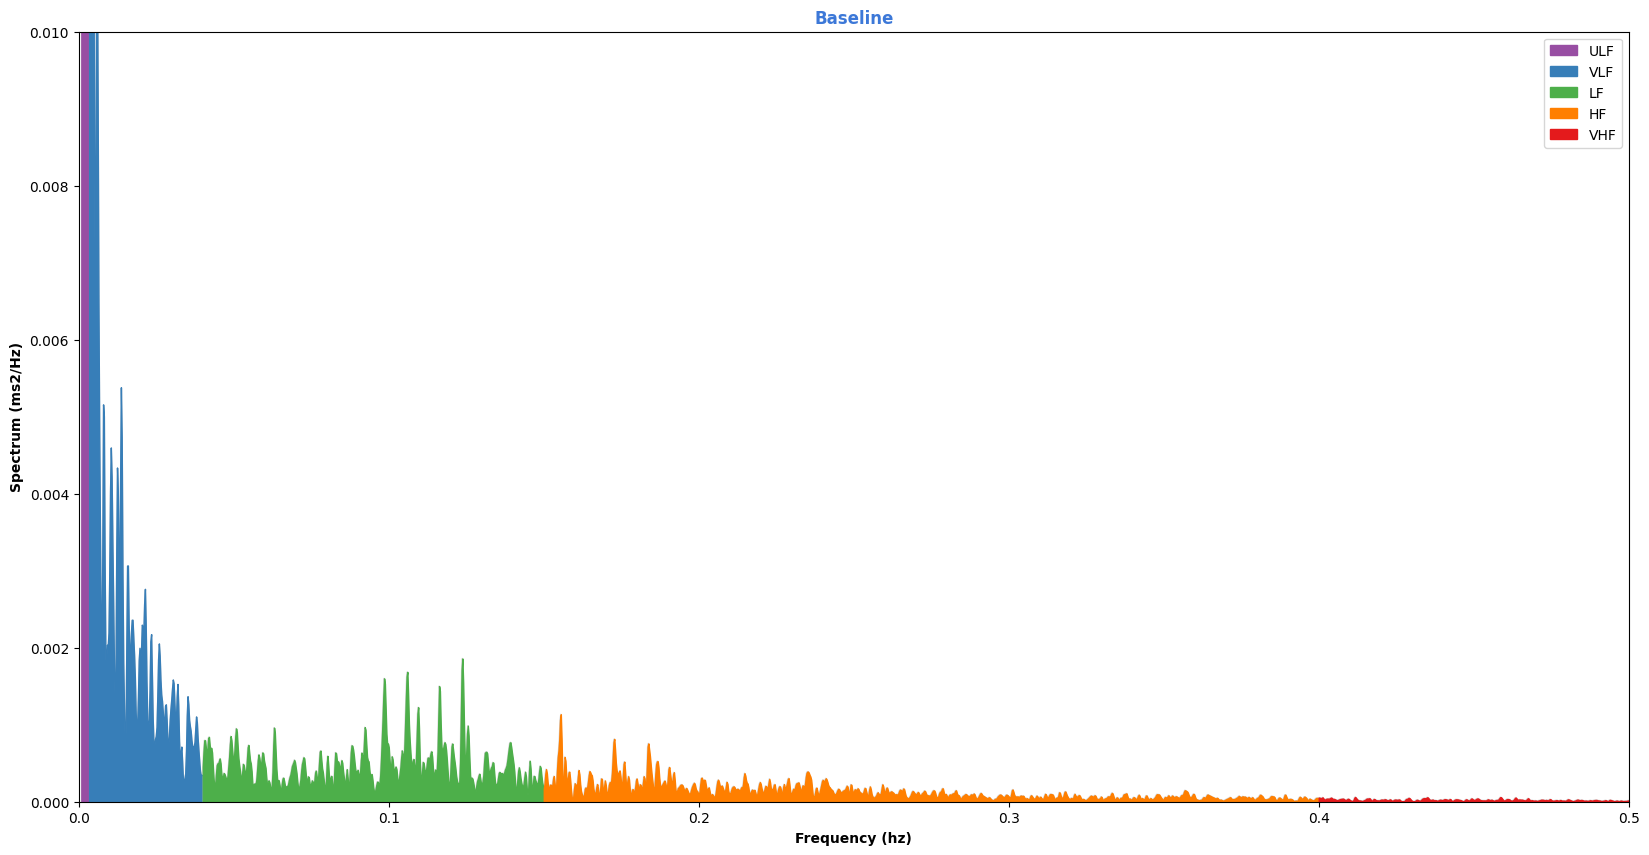

In [97]:
fig, ax = _hrv_frequency_show(baseline_rri, frequency_bands, sampling_rate=sampling_rate)

ax.set_title(f'{"Baseline".replace("_", " ").title()}', fontweight='bold', color= get_category_color("baseline"))
ax.set_xlabel(r"Frequency (hz)", fontweight='bold')
ax.set_ylabel(r"Spectrum (ms2/Hz)", fontweight='bold')
ax.set_xlim(0,0.5)
ax.set_ylim(0,0.01)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\1057777506.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Set1")


(0.0, 0.01)

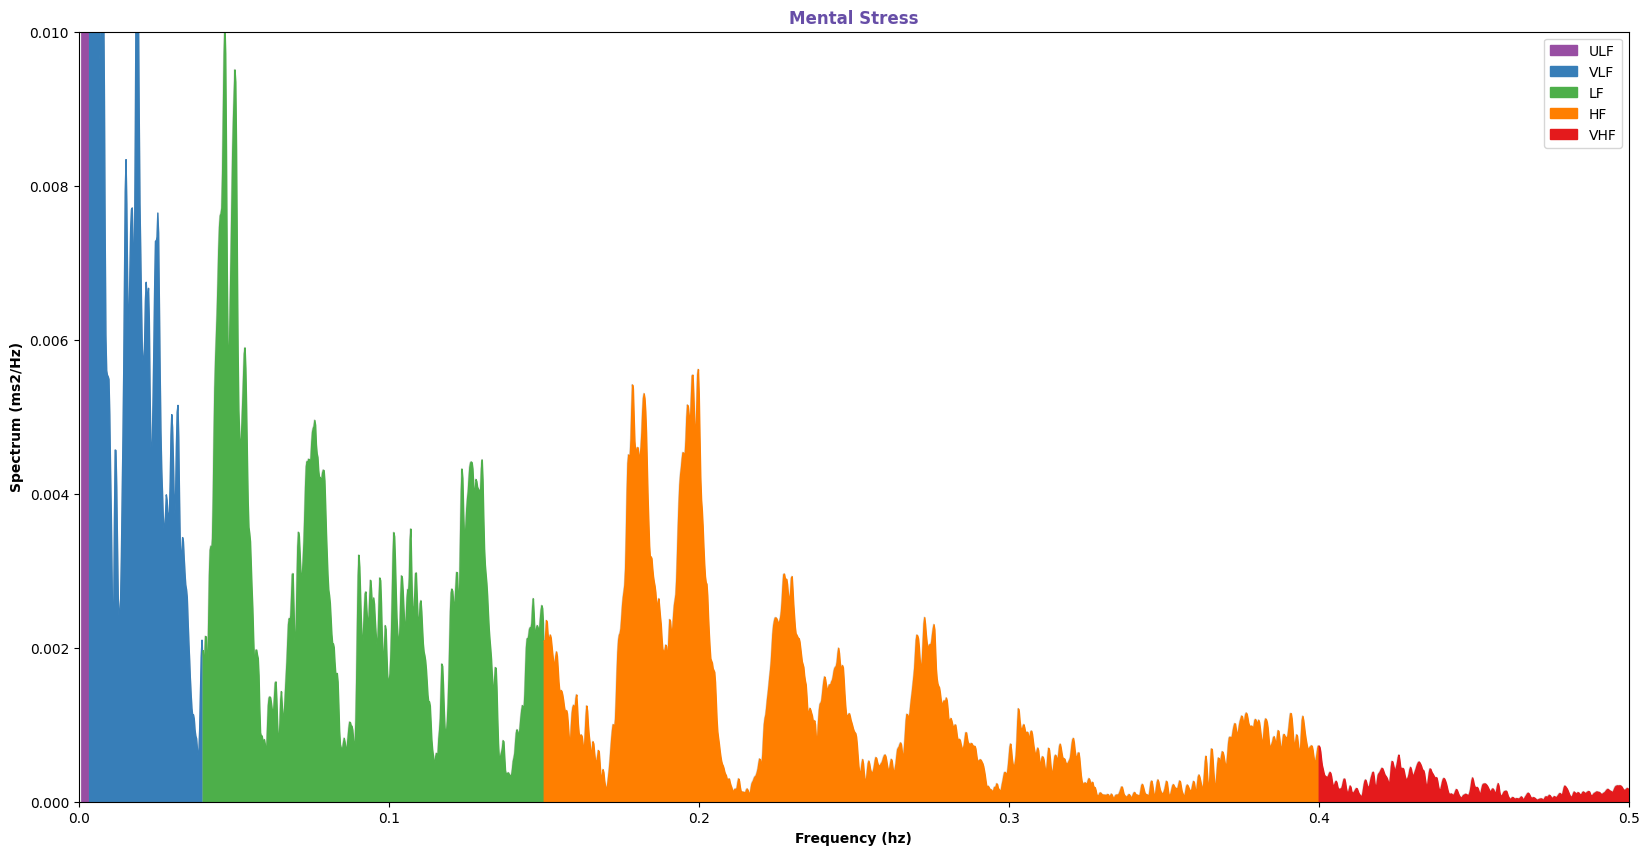

In [98]:
fig, ax = _hrv_frequency_show(mental_stress_rri, frequency_bands, sampling_rate=sampling_rate)

ax.set_title(f'{"Mental Stress".replace("_", " ").title()}', fontweight='bold', color= get_category_color("mental_stress"))
ax.set_xlabel(r"Frequency (hz)", fontweight='bold')
ax.set_ylabel(r"Spectrum (ms2/Hz)", fontweight='bold')
ax.set_xlim(0,0.5)
ax.set_ylim(0,0.01)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9756\1057777506.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("Set1")


(0.0, 0.01)

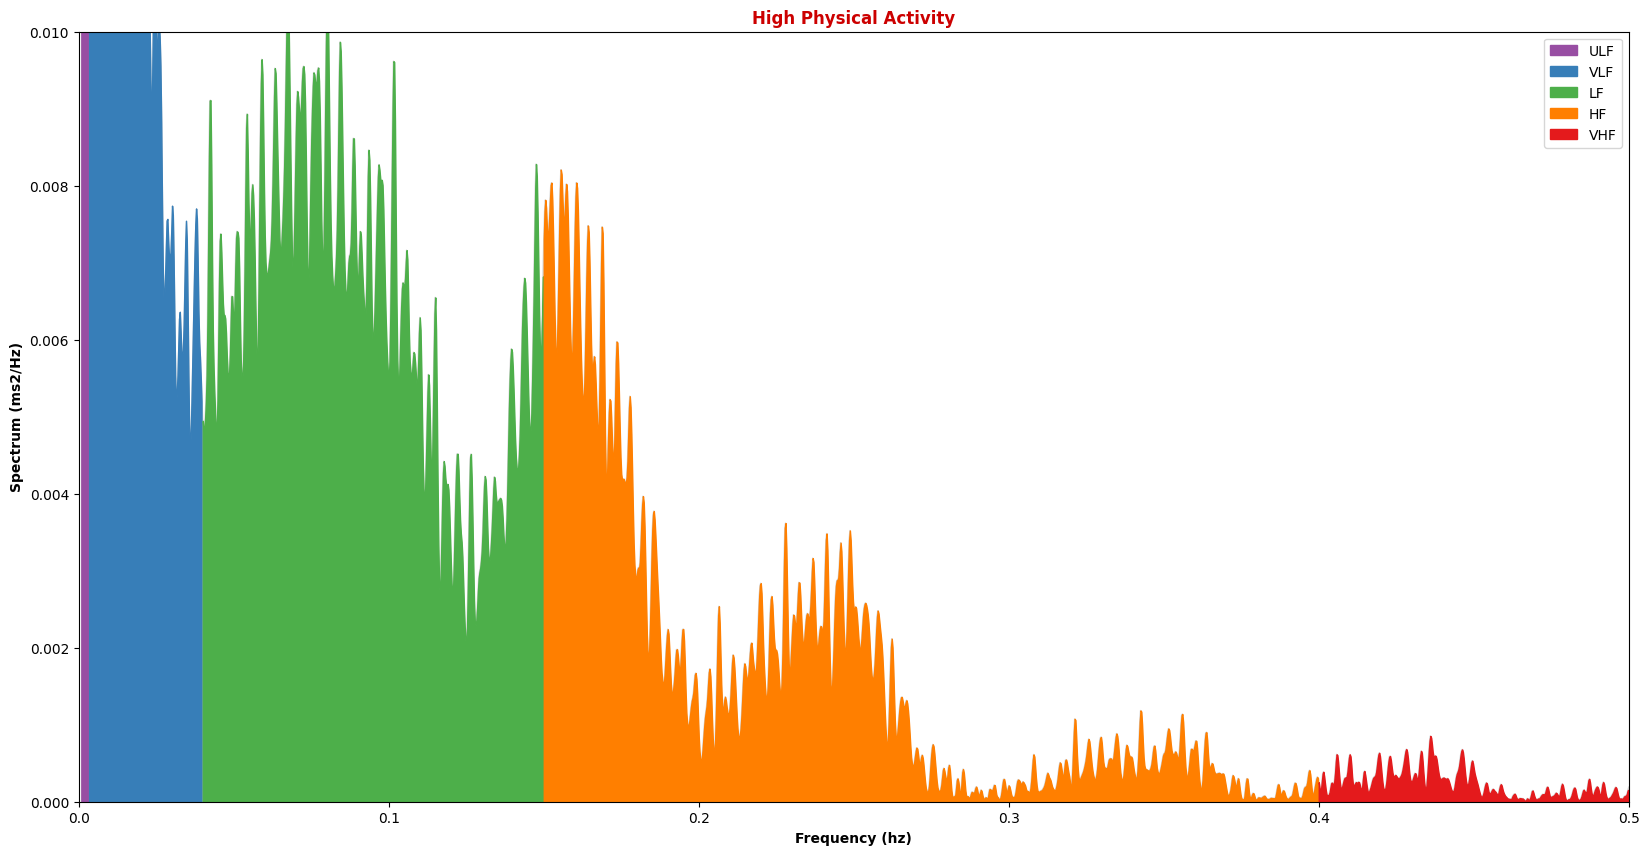

In [99]:
fig, ax = _hrv_frequency_show(high_physical_activity_rri, frequency_bands, sampling_rate=sampling_rate)

ax.set_title(f'{"High Physical Activity".replace("_", " ").title()}', fontweight='bold', color= get_category_color("high_physical_stress"))
ax.set_xlabel(r"Frequency (hz)", fontweight='bold')
ax.set_ylabel(r"Spectrum (ms2/Hz)", fontweight='bold')
ax.set_xlim(0,0.5)
ax.set_ylim(0,0.01)